## Author - Soni Mrunaliben
### Task1 - Prediction using Supervised Machine Learning

### Predict the percentage of an student based on the number of study hours

In [1]:
# import neccessary libraries

import pandas as pd
import numpy as np

In [2]:
# Import the dataset

students_data = pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv",
                           header=0)

In [3]:
students_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
students_data.shape

(25, 2)

In [5]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
students_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# making a 2-d plot to know the relationship between two variables

import matplotlib.pyplot as plt

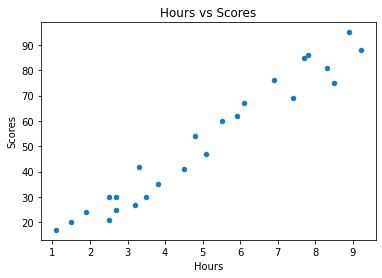

In [8]:
students_data.plot(kind = 'scatter', x = 'Hours', y = 'Scores')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


#####  So, from the graph we can see that how many hours are getting the score is also getting increased 
##### So, we can clearly say that there is a positive linear relationship between hours and score 

In [9]:
# To know the correation

students_data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### This means there is a positive linear relationship between two varibales which implies, if the number of hours increase the scores also increases

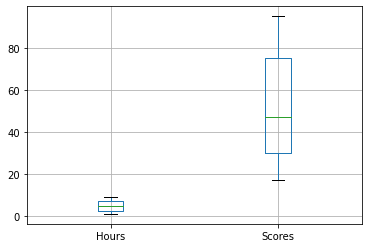

In [10]:
students_data.boxplot()

##### From this plot we can see that there are no outlier present in this dataset

## Linear Regression

In [11]:
# Deviding the data into attribute(input) and lables(output)

x = students_data.iloc[:,:-1].values
y = students_data.iloc[:,1].values

In [12]:
x.shape

(25, 1)

In [13]:
y.shape

(25,)

In [14]:
# Now spliting the dataset into train and test by using Scikit-Learn's built-in train_test_split() method

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

## Training the Algorithm

In [15]:
# We have splitten the data, now it's time to train our algorithm

from sklearn.linear_model import LinearRegression

# Create a model object
model = LinearRegression()

# Train the model object
model.fit(x_train,y_train)

LinearRegression()

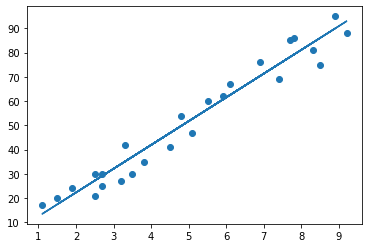

In [16]:
m = model.coef_
c = model.intercept_
line = m*x+c
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

In [17]:
# Predict using the model
y_pred = model.predict(x_test)
y_pred

array([17.37142335, 52.70292295, 35.03717315, 34.05574261, 46.81433968])

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


#### Now, predicting the scored if a student studies for 9.25 hours/day?

In [19]:
hours = 9.25
m * hours + c

array([93.43229054])

In [20]:
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

5.856684262506168
